In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import iminuit as minuit
from iminuit import Minuit
from iminuit.cost import LeastSquares
sys.path.append("../../..")
import circle

# FIT PRIMA RISONANZA 1.3K -50dBm

In [ ]:
file_path = f"Cavity_resonances_1.3K/res1-50dBm.txt"
f, z = circle.read_data(file_path)
print("Dati letti")

plt.figure()
plt.plot(f, np.abs(z), '.', label='Dati grezzi')
plt.xlabel('Frequenza [Hz]')
plt.ylabel('|S21|')
plt.legend()
plt.title("Dati grezzi")
plt.show()

z_nodelay = circle.remove_cable_delay(f, z)
plt.figure()
plt.plot(f, np.abs(z_nodelay), '.', label='Dati senza ritardo cavo')
plt.legend()
plt.title("Dati senza ritardo")
plt.show()

xc, yc, r = circle.fit_circle(z_nodelay.real, z_nodelay.imag)
z_rot, angle = circle.rotate_and_center(z_nodelay, xc, yc)
plt.figure()
plt.plot(f, np.abs(z_rot), '.', label='Dati ruotati e centrati')
plt.legend()
plt.title("Dati ruotati e centrati")
plt.show()

popt, pcov, f_cut, data_cut = circle.fit_lorentzian(f, np.abs(z_rot), cut_factor=cut_factor)

plt.figure()
plt.plot(f, np.abs(z_rot), '.', label='Dati ruotati e centrati')
plt.plot(f_cut, data_cut, 'o', label='Dati tagliati')
plt.plot(f_cut, circle.lorentzian_asymmetric(f_cut, *popt), '-', label='Fit lorentziana asimmetrica')
plt.xlabel('Frequenza [Hz]')
plt.ylabel('|S21|')
plt.legend()
plt.title("Fit con lorentziana asimmetrica")
plt.show()

print("Parametri del fit:")
print(f"a={popt[0]}, b={popt[1]}, c={popt[2]}, d={popt[3]}, k={popt[4]}, phi={popt[5]}, Qt={popt[6]}, Qc={popt[7]}, fr={popt[8]}")


TypeError: fit_full_resonator() missing 1 required positional argument: 'initial_params'

# FIT SECONDA RISONANZA 1.3K -50dBm

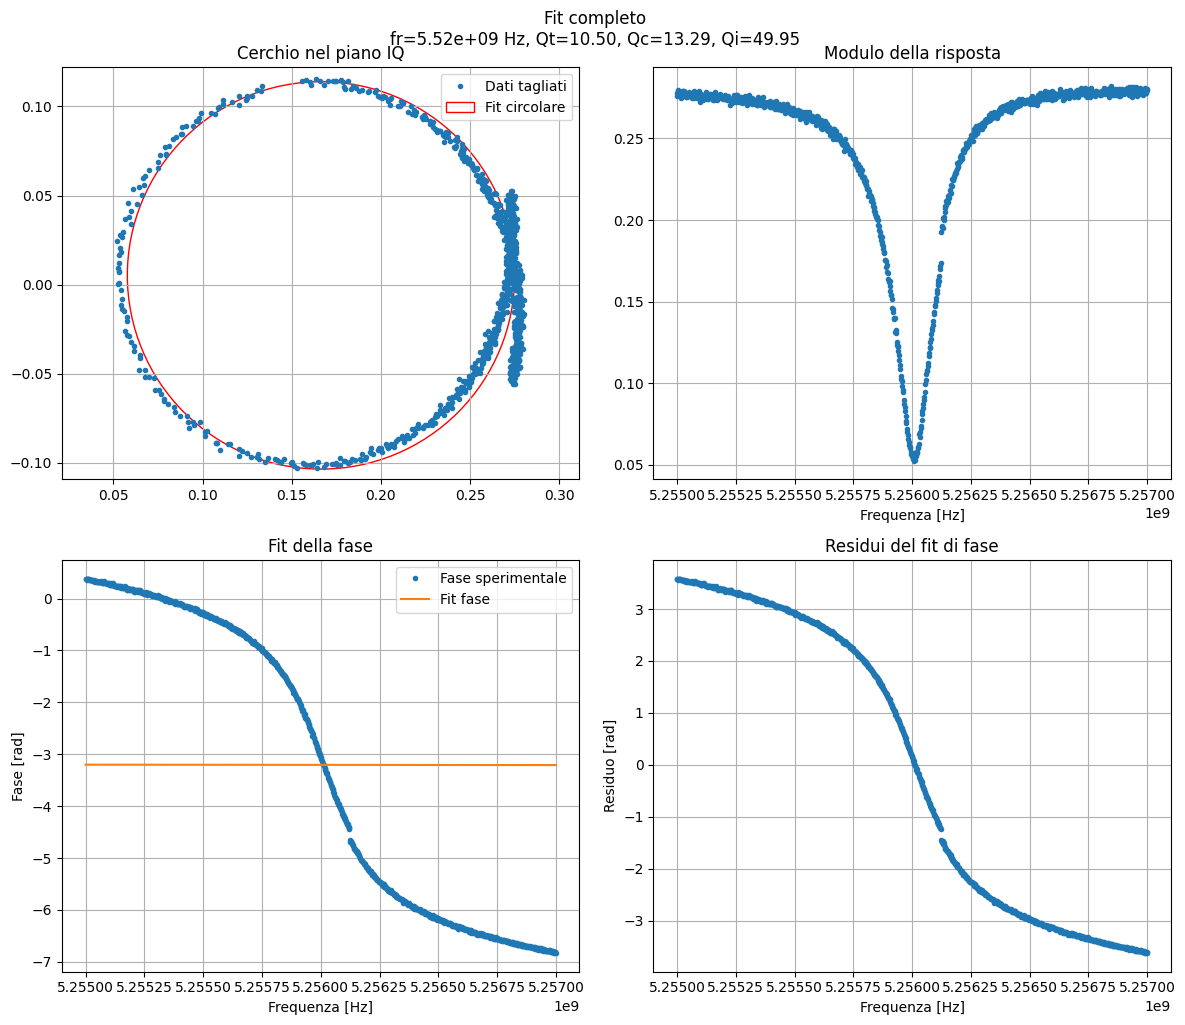

Qc = 1.33e+01, Qi = 4.99e+01, Qt = 1.05e+01, fr = 5.518720e+09 Hz


In [8]:
file_path = f"Cavity_resonances_1.3K/res2-50dBm.txt"
initial_params = {
    'a': 1,  # Ultimo valore di fr ottenuto
    'b': 10e-9,  # Ultimo valore di Qc ottenuto
    'c': 10e-18,       # Impostazione predefinita per c, d, k, phi, Qt, Qc, fr
    'd': 10e-27,
    'k': 2.5,
    'phi': 0.42,
    'Qt': 5000,
    'Qc': 100000,
    'fr': 5809178611  # Ultima frequenza di risonanza come valore iniziale
}
Qc, Qi, Qt, fr = circle.fit_full_resonator(file_path, initial_params, 1, delimiter=' ')
print(f"Qc = {Qc:.2e}, Qi = {Qi:.2e}, Qt = {Qt:.2e}, fr = {fr:.6e} Hz")


# FIT TERZA RISONANZA 1.3K -50dBm

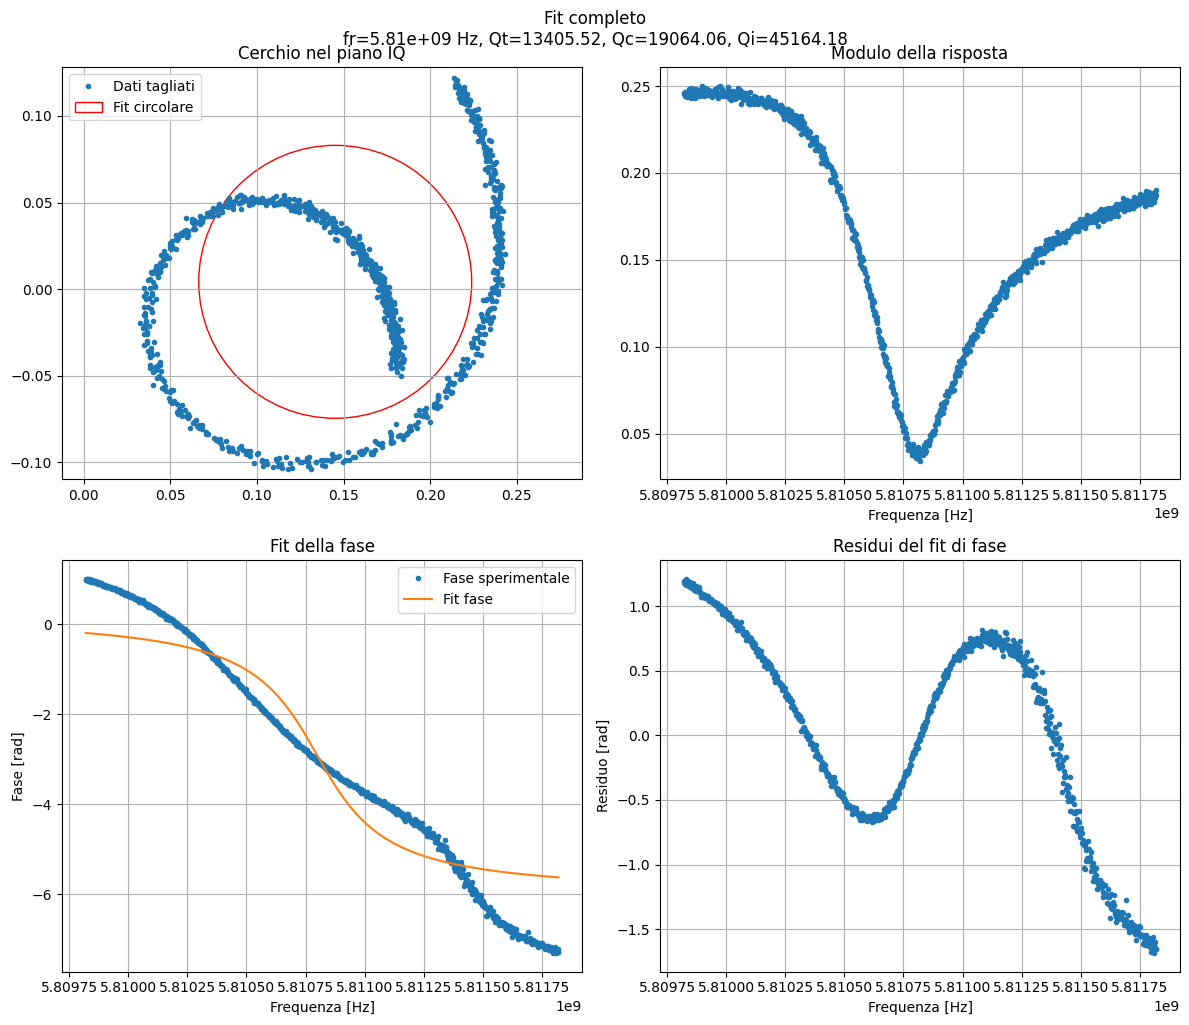

Qc = 1.91e+04, Qi = 4.52e+04, Qt = 1.34e+04, fr = 5.810798e+09 Hz


In [11]:
file_path = f"Cavity_resonances_1.3K/res3-50dBm.txt"

initial_params = {
    'a': 1,  # Ultimo valore di fr ottenuto
    'b': 10e-9,  # Ultimo valore di Qc ottenuto
    'c': 10e-18,       # Impostazione predefinita per c, d, k, phi, Qt, Qc, fr
    'd': 10e-27,
    'k': 2.5,
    'phi': 0.42,
    'Qt': 16000,
    'Qc': 200000,
    'fr': 5810755611  # Ultima frequenza di risonanza come valore iniziale
}

Qc, Qi, Qt, fr = circle.fit_full_resonator(file_path, initial_params, 10, delimiter=' ')
print(f"Qc = {Qc:.2e}, Qi = {Qi:.2e}, Qt = {Qt:.2e}, fr = {fr:.6e} Hz")

# FIT QUARTA RISONANZA 1.3K -50dBm

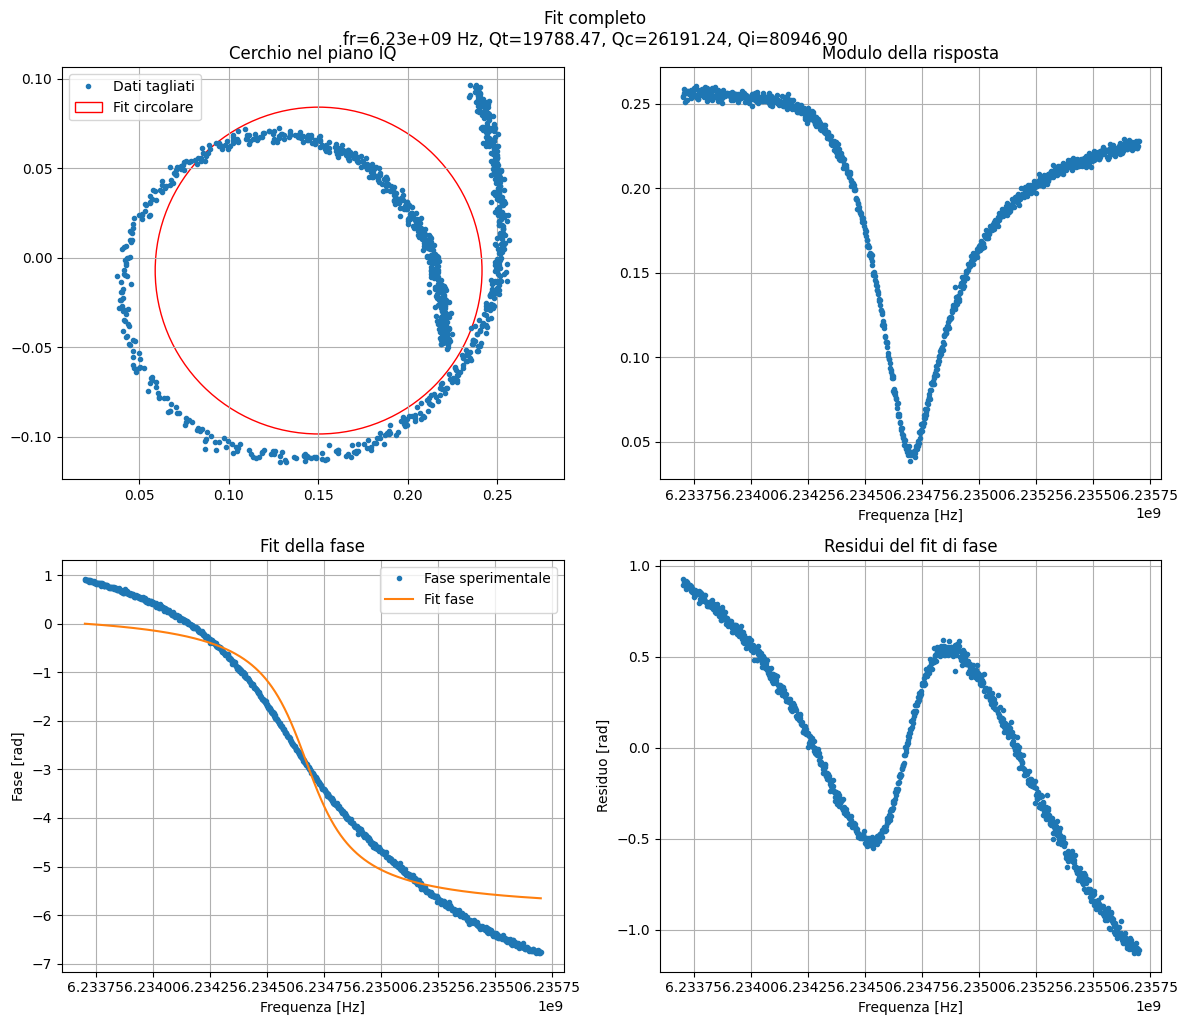

Qc = 2.62e+04, Qi = 8.09e+04, Qt = 1.98e+04, fr = 6.234671e+09 Hz


In [13]:
file_path = f"Cavity_resonances_1.3K/res4-50dBm.txt"



initial_params = {
    'a': 1,  # Ultimo valore di fr ottenuto
    'b': 10e-9,  # Ultimo valore di Qc ottenuto
    'c': 10e-18,       # Impostazione predefinita per c, d, k, phi, Qt, Qc, fr
    'd': 10e-27,
    'k': 1,
    'phi': 0.01,
    'Qt': 5310,
    'Qc':50770,
    'fr': 6202500000  # Ultima frequenza di risonanza come valore iniziale
}

Qc, Qi, Qt, fr = circle.fit_full_resonator(file_path, initial_params, 1, delimiter=' ')
print(f"Qc = {Qc:.2e}, Qi = {Qi:.2e}, Qt = {Qt:.2e}, fr = {fr:.6e} Hz")